### Replicating Issue: https://github.com/pylidc/pylidc/issues/2

Data used: raw untouched data from https://public.cancerimagingarchive.net (downloaded on April 15, 2017)

In [30]:
import pylidc as pl
import os

In [31]:
qu = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1)
print(qu.count())
# => 97

scan = qu.first()
print(scan.patient_id, scan.pixel_spacing, scan.slice_thickness)
# => LIDC-IDRI-0066, 0.63671875, 0.6

print(len(scan.annotations))
# => 11

print(scan.get_path_to_dicom_files())

97
LIDC-IDRI-0066 0.63671875 0.6
11
/kaggle_2/lidc_idri/data/LIDC/DOI/LIDC-IDRI-0066/1.3.6.1.4.1.14519.5.2.1.6279.6001.143774983852765282237869625332/1.3.6.1.4.1.14519.5.2.1.6279.6001.430109407146633213496148200410


In [32]:
scan.visualize()

Loading dicom files ... This may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle_2/lidc_idri/data/LIDC/DOI/LIDC-IDRI-0066/1.3.6.1.4.1.14519.5.2.1.6279.6001.143774983852765282237869625332/1.3.6.1.4.1.14519.5.2.1.6279.6001.430109407146633213496148200410/000000.dcm'

In [33]:
os.listdir(scan.get_path_to_dicom_files())

['000614.dcm',
 '000149.dcm',
 '000633.dcm',
 '000244.dcm',
 '000730.dcm',
 '000361.dcm',
 '000421.dcm',
 '000455.dcm',
 '000602.dcm',
 '000555.dcm',
 '000691.dcm',
 '000697.dcm',
 '000473.dcm',
 '000258.dcm',
 '000126.dcm',
 '000563.dcm',
 '000352.dcm',
 '000447.dcm',
 '000432.dcm',
 '000045.dcm',
 '000252.dcm',
 '000546.dcm',
 '000238.dcm',
 '000189.dcm',
 '000416.dcm',
 '000369.dcm',
 '000489.dcm',
 '000467.dcm',
 '000239.dcm',
 '000142.dcm',
 '000684.dcm',
 '000522.dcm',
 '000443.dcm',
 '000732.dcm',
 '000678.dcm',
 '000582.dcm',
 '000708.dcm',
 '000716.dcm',
 '000558.dcm',
 '000413.dcm',
 '000296.dcm',
 '000578.dcm',
 '000029.dcm',
 '000610.dcm',
 '000655.dcm',
 '000373.dcm',
 '000179.dcm',
 '000457.dcm',
 '000450.dcm',
 '000618.dcm',
 '000548.dcm',
 '000107.dcm',
 '000052.dcm',
 '000003.dcm',
 '000177.dcm',
 '000598.dcm',
 '000358.dcm',
 '000180.dcm',
 '000008.dcm',
 '000579.dcm',
 '000206.dcm',
 '000054.dcm',
 '000353.dcm',
 '000728.dcm',
 '000617.dcm',
 '000066.dcm',
 '000688.d

### Checking if 000000.dcm exists for another patient

In [1]:
no_zero_counter = 0
for i in range(qu.count()):
    file_list = os.listdir(qu[i].get_path_to_dicom_files())
    zero_check = '000000.dcm'
    if zero_check in file_list:
        print(qu[i].patient_id, "contains file:", zero_check)
    else:
        no_zero_counter += 1
print('---')
print(no_zero_counter, "/", qu.count()  ,"patients DID NOT have file:", zero_check)

NameError: name 'qu' is not defined

## Running Local pylidc to fix issue

In [2]:
import sys
path_to_add = '/kaggle/dev/pylidc'
if path_to_add not in sys.path:
    sys.path.insert(0, '/kaggle/dev/pylidc')
sys.path

['/kaggle/dev/pylidc',
 '',
 '/home/plexadmin/.virtualenvs/data-science-bowl-2017/lib/python35.zip',
 '/home/plexadmin/.virtualenvs/data-science-bowl-2017/lib/python3.5',
 '/home/plexadmin/.virtualenvs/data-science-bowl-2017/lib/python3.5/plat-x86_64-linux-gnu',
 '/home/plexadmin/.virtualenvs/data-science-bowl-2017/lib/python3.5/lib-dynload',
 '/usr/lib/python3.5',
 '/usr/lib/python3.5/plat-x86_64-linux-gnu',
 '/home/plexadmin/.virtualenvs/data-science-bowl-2017/lib/python3.5/site-packages',
 '/home/plexadmin/.virtualenvs/data-science-bowl-2017/src/tqdm',
 '/home/plexadmin/.virtualenvs/data-science-bowl-2017/lib/python3.5/site-packages/IPython/extensions',
 '/home/plexadmin/.ipython']

In [3]:
import pylidc as pl

In [4]:
qu = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1)
print(qu.count())
# => 97

scan = scan = qu.first() #qu[2]
print(scan.patient_id, scan.pixel_spacing, scan.slice_thickness)
# => LIDC-IDRI-0066, 0.63671875, 0.6

print(len(scan.annotations))
# => 11

print(scan.get_path_to_dicom_files())

97
LIDC-IDRI-0066 0.63671875 0.6
11
/kaggle_2/lidc_idri/data/LIDC/DOI/LIDC-IDRI-0066/1.3.6.1.4.1.14519.5.2.1.6279.6001.143774983852765282237869625332/1.3.6.1.4.1.14519.5.2.1.6279.6001.430109407146633213496148200410


Loading dicom files ... This may take a moment.


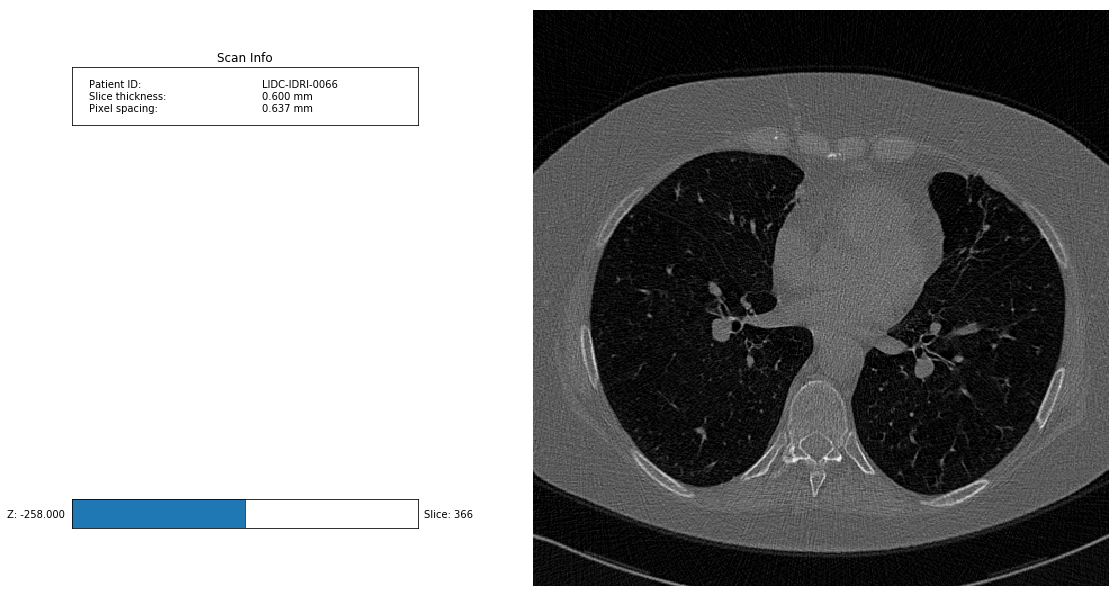

In [5]:
scan.visualize()

In [6]:
qu = pl.query(pl.Annotation).filter(pl.Annotation.lobulation > 3, pl.Annotation.malignancy == 5)
print(qu.count())
# => 183

ann = qu.first()
print(ann.lobulation, ann.Lobulation(), ann.malignancy, ann.Malignancy())
# => 4, Near Marked Lobulation, 5, Highly Suspicious

print(len(ann.contours))
# => 8

print(ann.contours_to_matrix().shape)
# => (671, 3)

print(ann.contours_to_matrix().mean(axis=0) - ann.centroid())
# => [ 0.  0.  0.]

183
4 Near Marked Lobulation 5 Highly Suspicious
8
(671, 3)
[ 0.  0.  0.]


Loading dicom files ... This may take a moment.


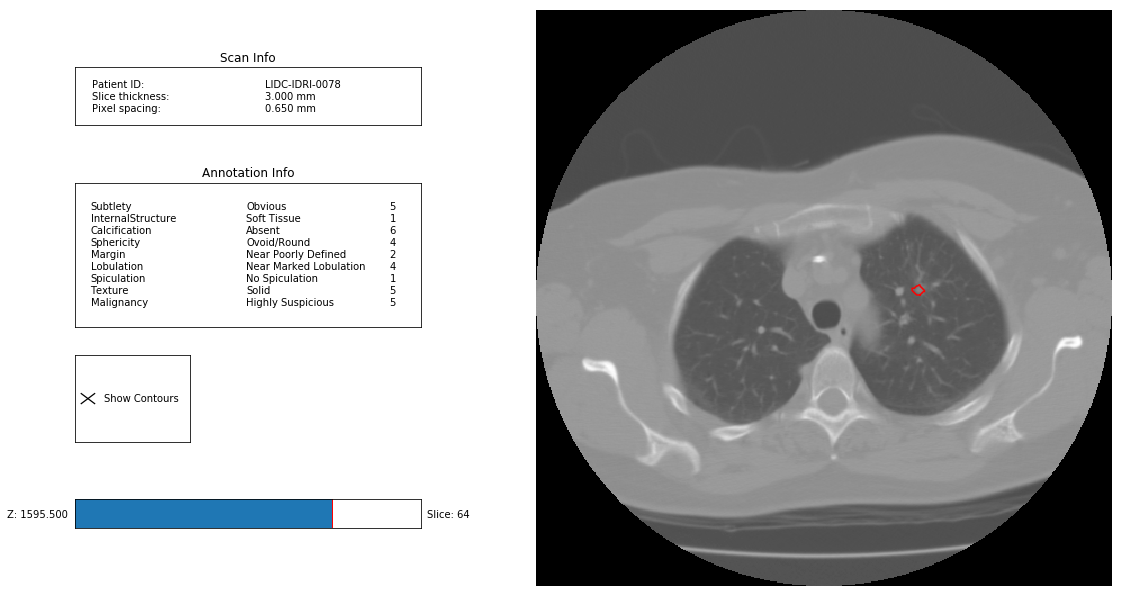

In [7]:
ann.visualize_in_scan()

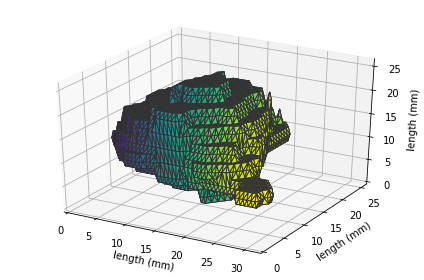

In [8]:
ann.visualize_in_3d()

In [9]:
from sqlalchemy import func
scan = pl.query(pl.Scan).filter(pl.Scan.contrast_used == True).order_by(func.random()).first()
ann  = pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 5).order_by(func.random()).first()

In [10]:
anns = pl.query(pl.Annotation).join(pl.Scan).filter(pl.Scan.slice_thickness < 1, pl.Annotation.malignancy != 3)

Loading dicom files ... This may take a moment.
(101, 101, 101) (101, 101, 101)


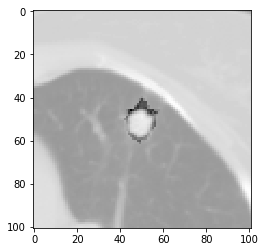

In [11]:
ann = pl.query(pl.Annotation).first()
vol, seg = ann.uniform_cubic_resample(side_length = 100)
print(vol.shape, seg.shape)
# => (101, 101, 101) (101, 101, 101)

import matplotlib.pyplot as plt
plt.imshow( vol[:,:,50] * (seg[:,:,50]*0.8 + 0.2), cmap=plt.cm.gray)
plt.show()

###### Faulty Patient

In [54]:
qu = pl.query(pl.Scan).filter(pl.Scan.patient_id == "LIDC-IDRI-0883")
scan = qu.first()
print (scan.patient_id, scan.pixel_spacing, scan.slice_thickness)

LIDC-IDRI-0883 0.66015625 2.0


Loading dicom files ... This may take a moment.


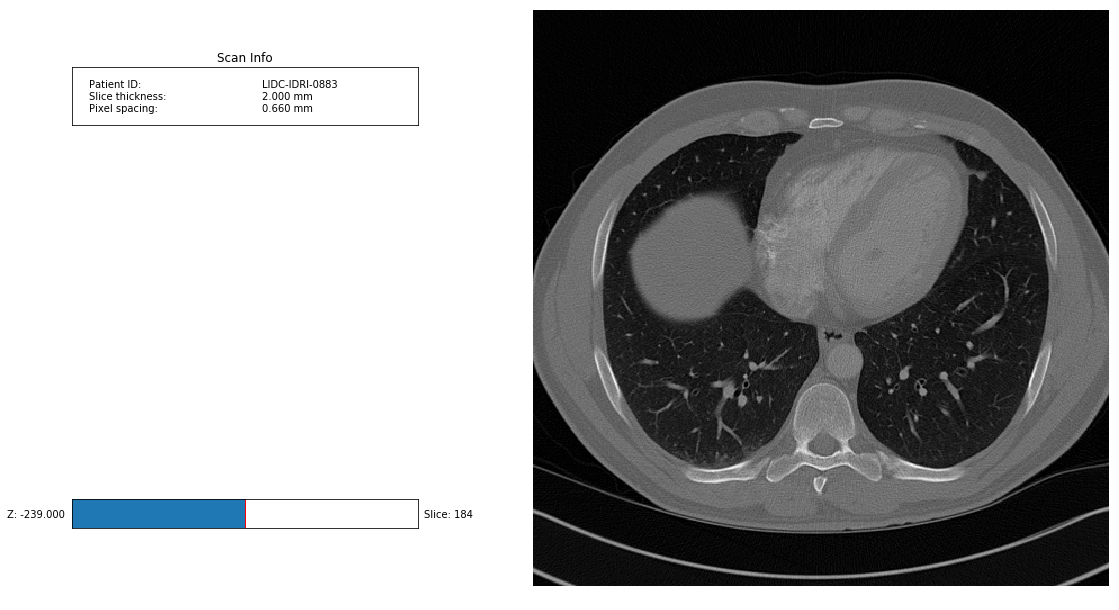

In [55]:
scan.visualize()

In [69]:
ann = scan.annotations[0]
print(scan.annotations)
print (ann.spiculation, ann.Spiculation())
print(len(scan.annotations))

[Annotation(id=5210,scan_id=772), Annotation(id=5211,scan_id=772), Annotation(id=5212,scan_id=772)]
1 No Spiculation
3


In [57]:
print(ann.estimate_diameter(), ann.estimate_volume())

8.16568184448 107.862052917


Loading dicom files ... This may take a moment.


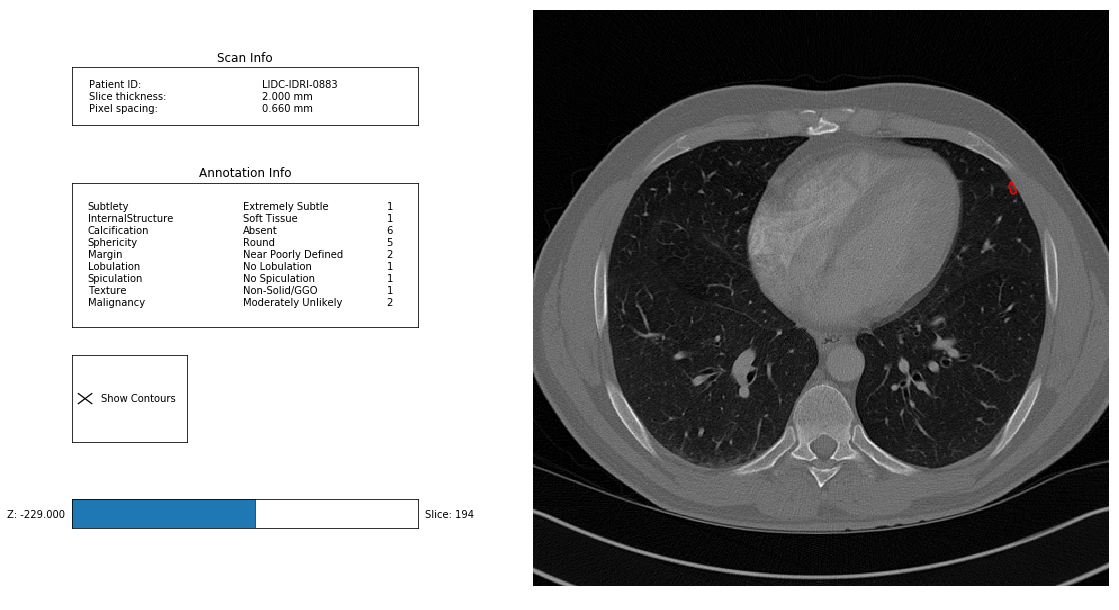

Loading dicom files ... This may take a moment.


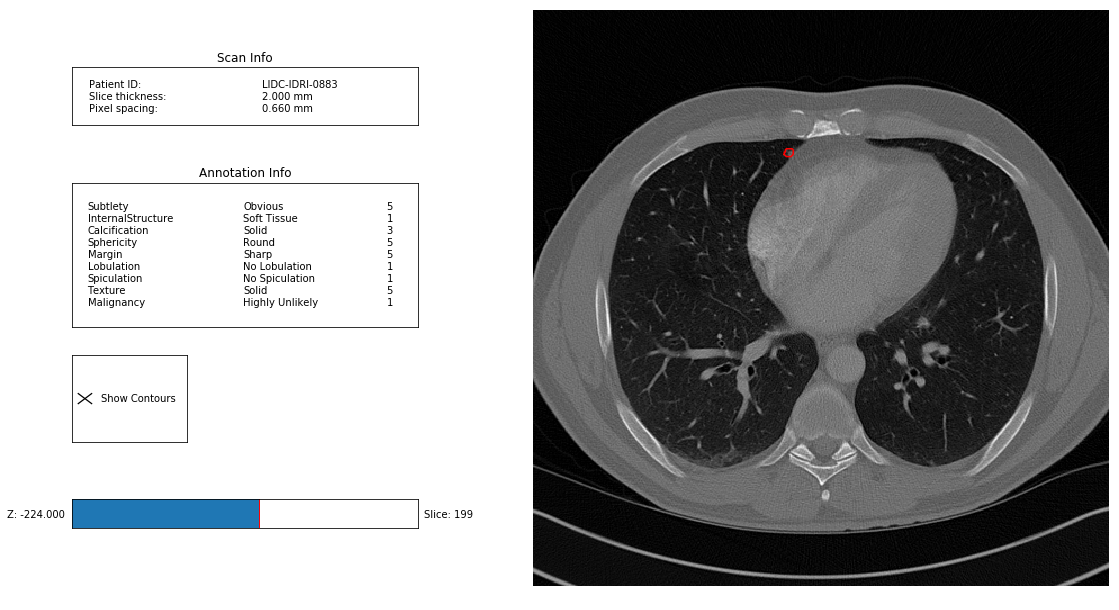

Loading dicom files ... This may take a moment.


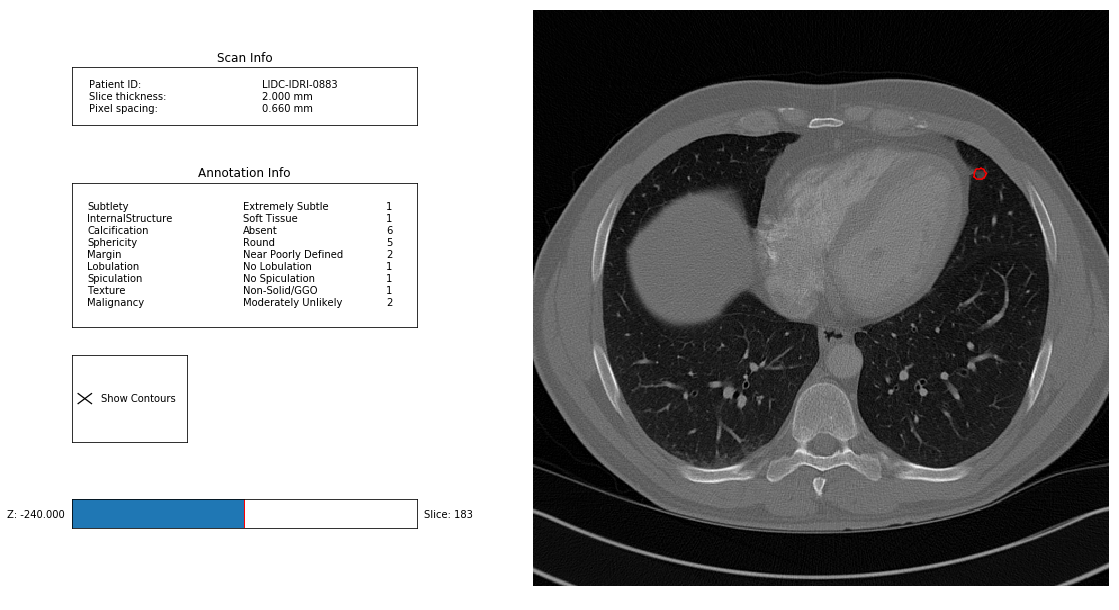

In [64]:
scan.annotations[0].visualize_in_scan()
scan.annotations[1].visualize_in_scan()
scan.annotations[2].visualize_in_scan()

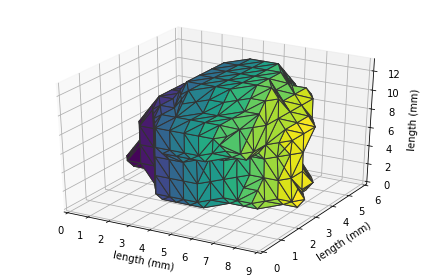

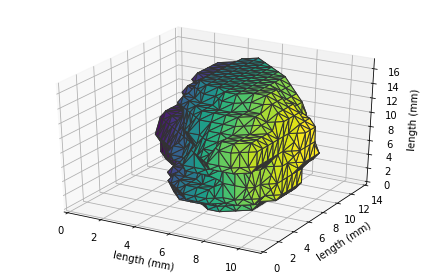

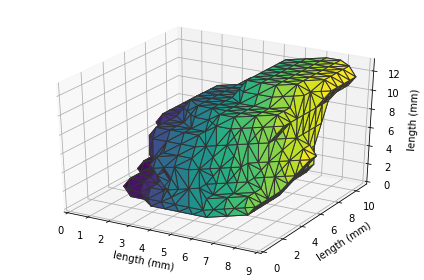

In [65]:
scan.annotations[0].visualize_in_3d()
scan.annotations[1].visualize_in_3d()
scan.annotations[2].visualize_in_3d()

In [68]:
print(scan.annotations[0].contours_to_matrix().mean(axis=0))
print(scan.annotations[1].contours_to_matrix().mean(axis=0))
print(scan.annotations[2].contours_to_matrix().mean(axis=0))

[ 426.1292517   157.23129252 -226.71428571]
[ 228.34323432  126.57425743 -220.4290429 ]
[ 398.6978022   146.81318681 -237.64835165]
